**RUTHVIK SAI D**

**21BDS0136**



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score




In [14]:
#1: Load the Dataset
file_path = r"/content/bodyPerformance.csv"
data = pd.read_csv(file_path)
print(data.head())



   age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0   27      M      172.3      75.24        21.3       80.0     130.0   
1   25      M      165.0      55.80        15.7       77.0     126.0   
2   31      M      179.6      78.00        20.1       92.0     152.0   
3   32      M      174.5      71.10        18.4       76.0     147.0   
4   28      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B  


In [15]:
#2: Explore Dataset Dimensions and Summary
print("Dataset Dimensions: ", data.shape)
print("\nSummary Statistics:\n", data.describe())



Dataset Dimensions:  (13393, 12)

Summary Statistics:
                 age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13392.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240258     78.796842   
std       13.625639      8.426583     11.949666      7.257107     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  13392.000000  13393.000000             13393.000000    13393.000000   
mean     130.233938     36.963877                15.209268       39.771224   

In [49]:
#Data Deduplication
data = data.drop_duplicates()

In [18]:
#3: Data Handling and Cleaning
# Fill missing values with median/mode
data['gender'].fillna(data['gender'].mode()[0], inplace=True)
data['body fat_%'].fillna(data['body fat_%'].median(), inplace=True)
data['systolic'].fillna(data['systolic'].median(), inplace=True)
# Check for any remaining missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64


**BINNING**

In [56]:
# Binning (Discretization)
# Binning the 'age' column into categories
age_bins = [20, 30, 40, 50, 60, 70]  # You can adjust these bin ranges
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

# Binning the 'body fat_%' column into categories
body_fat_bins = [0, 10, 20, 30, 40, 100]  # These ranges can be adjusted based on your understanding of body fat
body_fat_labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-100%']
data['body_fat_group'] = pd.cut(data['body fat_%'], bins=body_fat_bins, labels=body_fat_labels)

# Verify Binning Results
print("\nBinning Applied to 'age' and 'body fat_%':\n", data[['age', 'age_group', 'body fat_%', 'body_fat_group']].head())


Binning Applied to 'age' and 'body fat_%':
    age age_group  body fat_% body_fat_group
0   27     20-30        21.3         20-30%
1   25     20-30        15.7         10-20%
2   31     30-40        20.1         20-30%
3   32     30-40        18.4         10-20%
4   28     20-30        17.1         10-20%


**MODULE - 3**

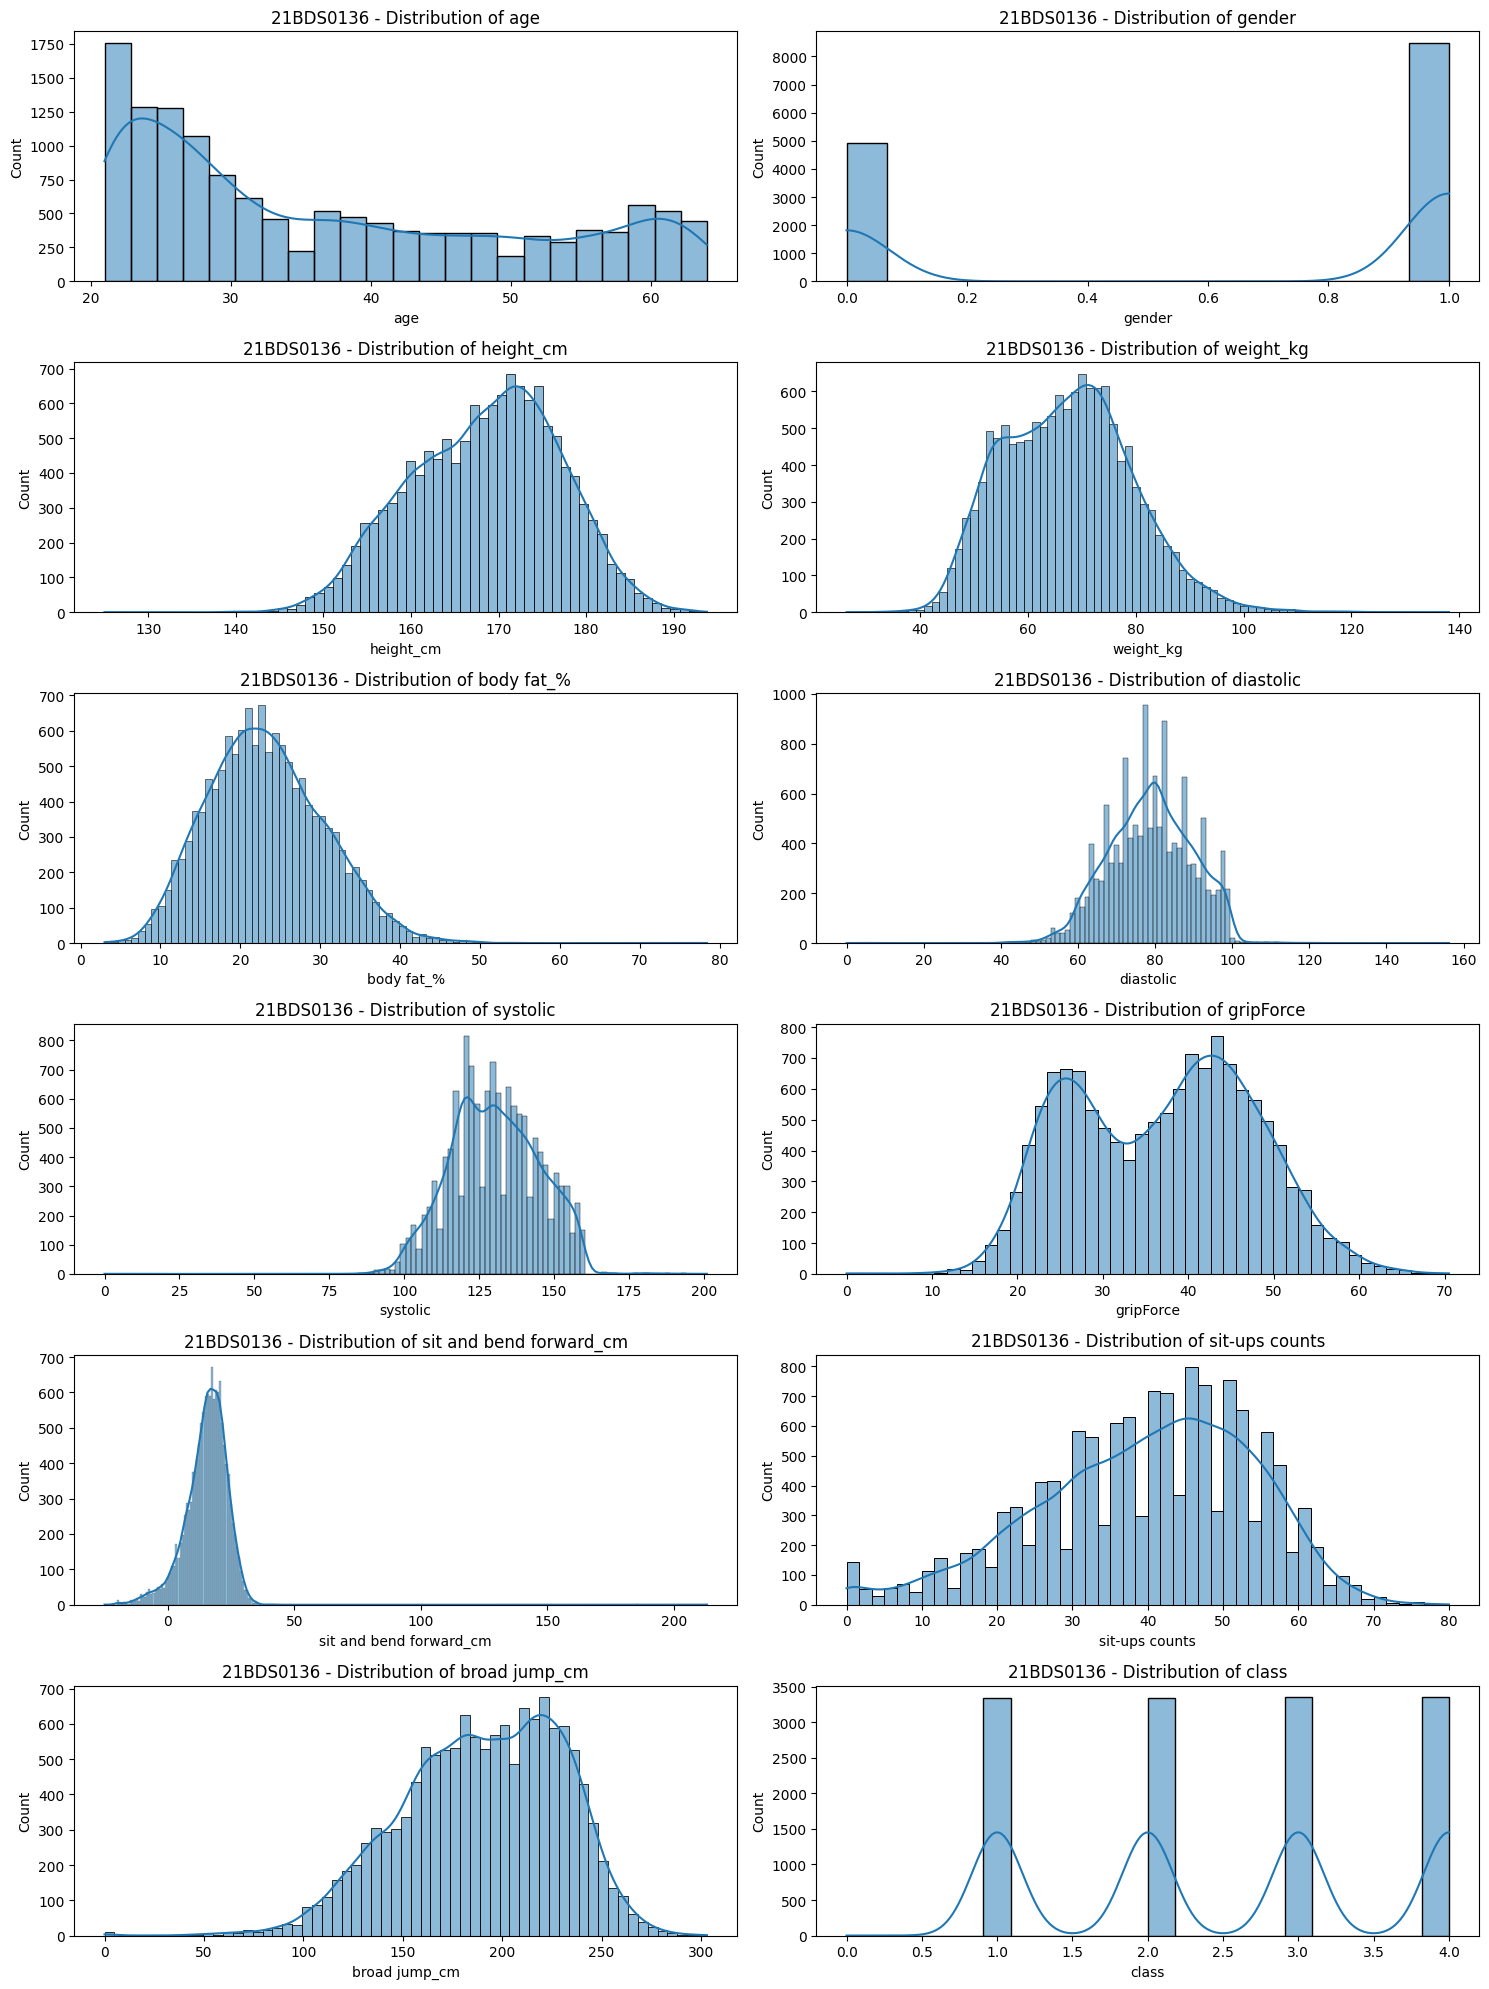

In [58]:

#Univariate Analysis
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(6, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'21BDS0136 - Distribution of {col}')
plt.tight_layout()
plt.show()



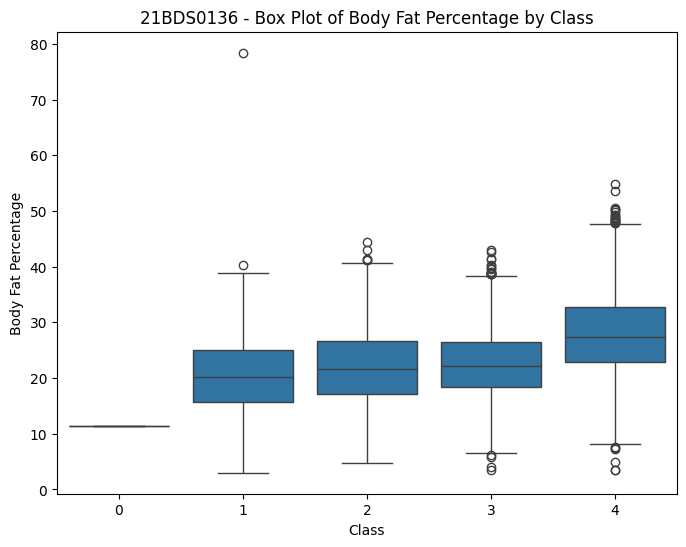

In [63]:
# Box plot for 'body fat_%' grouped by 'class'
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='body fat_%', data=data)
plt.title('21BDS0136 - Box Plot of Body Fat Percentage by Class')
plt.xlabel('Class')
plt.ylabel('Body Fat Percentage')
plt.show()

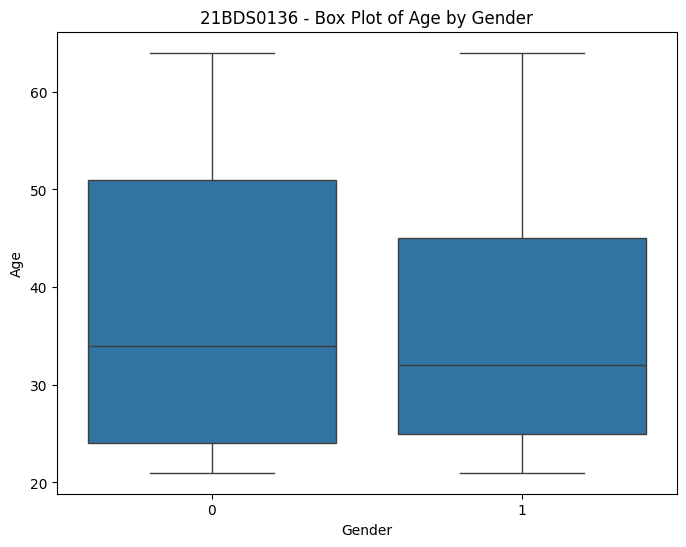

In [64]:

# Box plot for 'age' grouped by 'gender'
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=data)
plt.title('21BDS0136 - Box Plot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


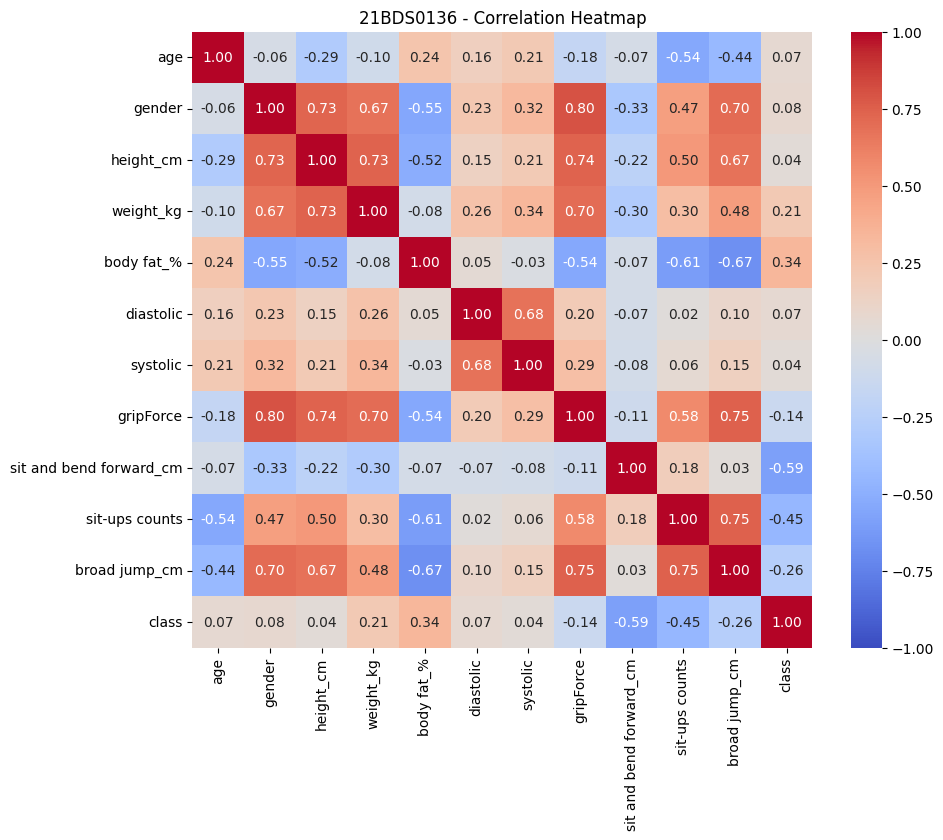

In [59]:
#Bivariate Analysis (Correlation Matrix)
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('21BDS0136 - Correlation Heatmap')
plt.show()


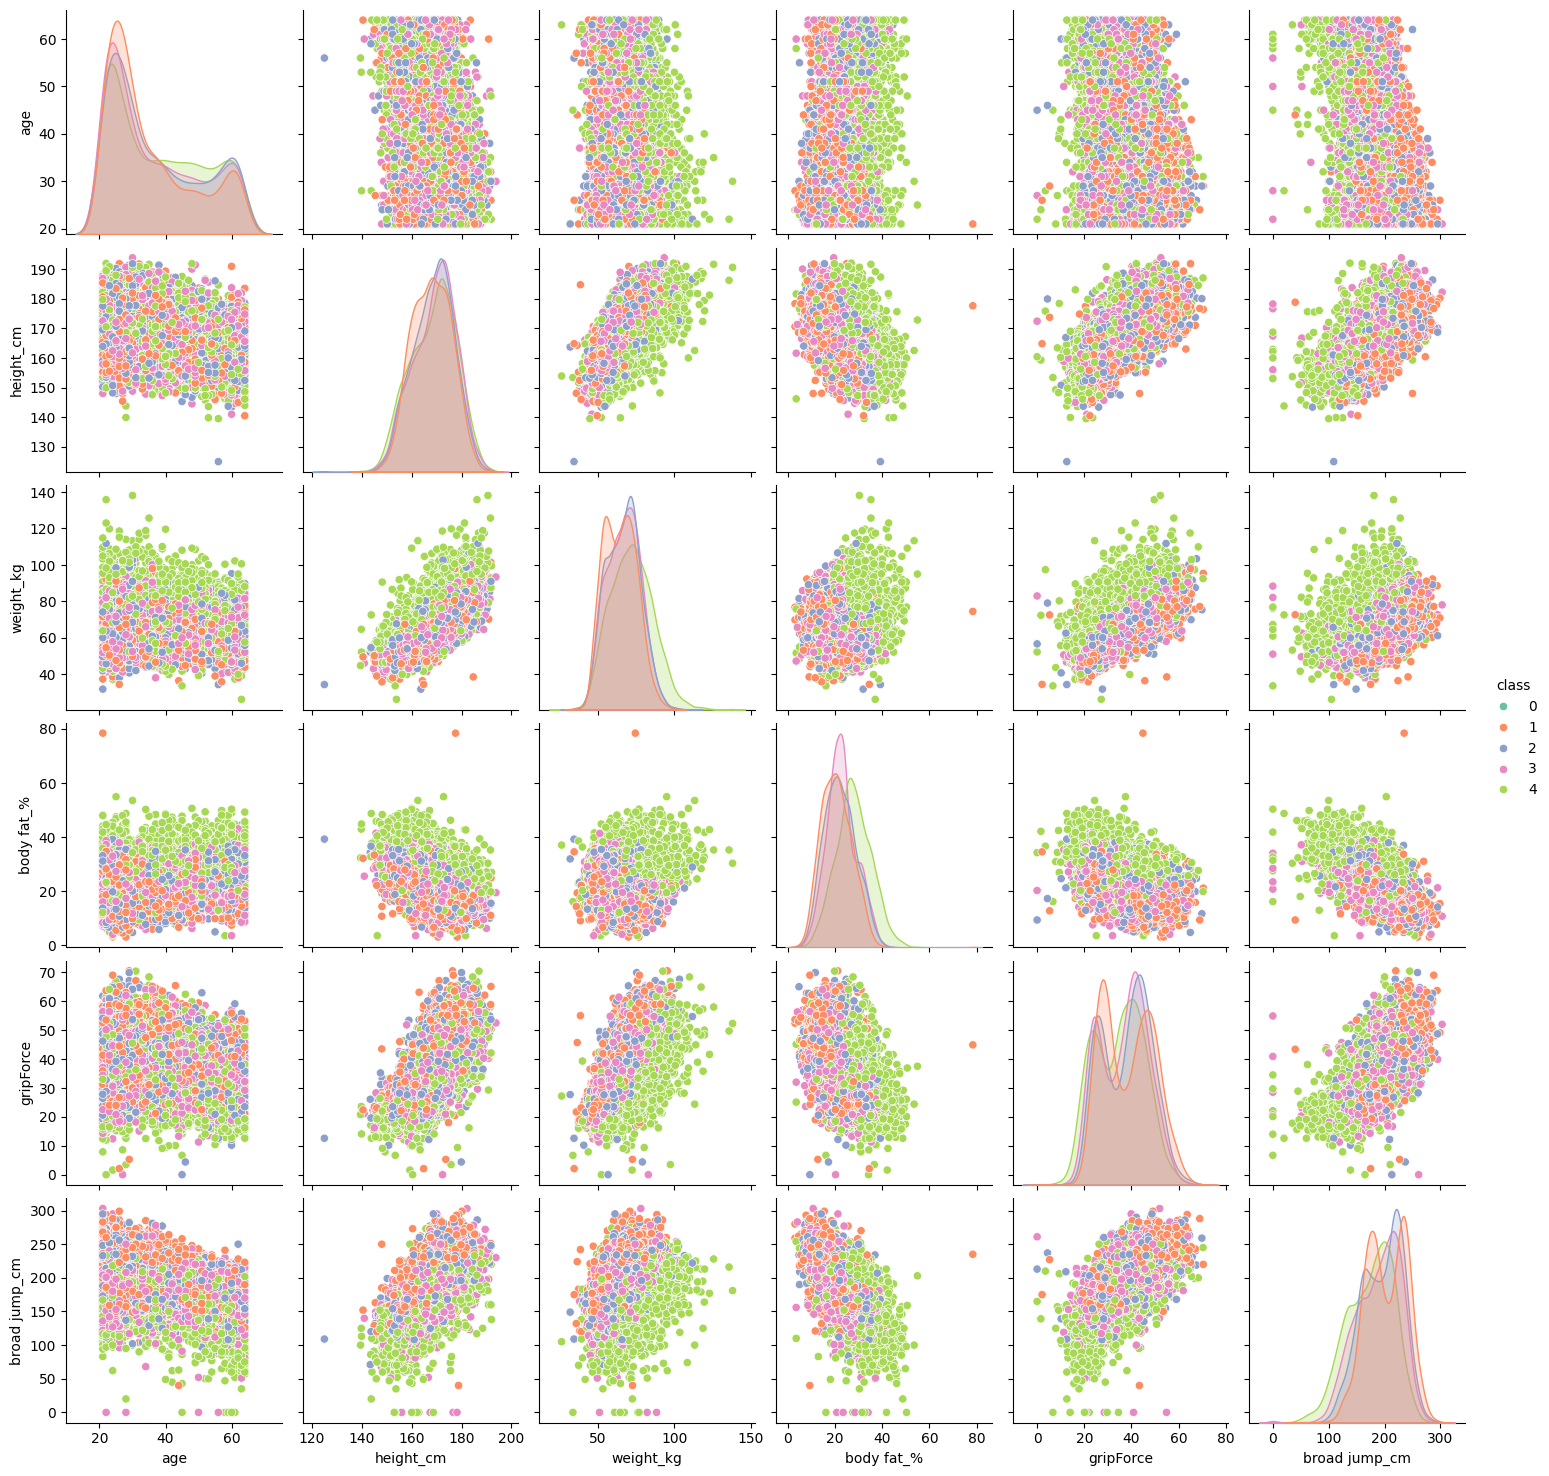

In [60]:
#Multivariate Analysis (Pairplot with class as hue)
selected_columns = ['age', 'height_cm', 'weight_kg', 'body fat_%', 'gripForce', 'broad jump_cm', 'class']
sns.pairplot(data[selected_columns], hue='class', palette='Set2')
plt.show()

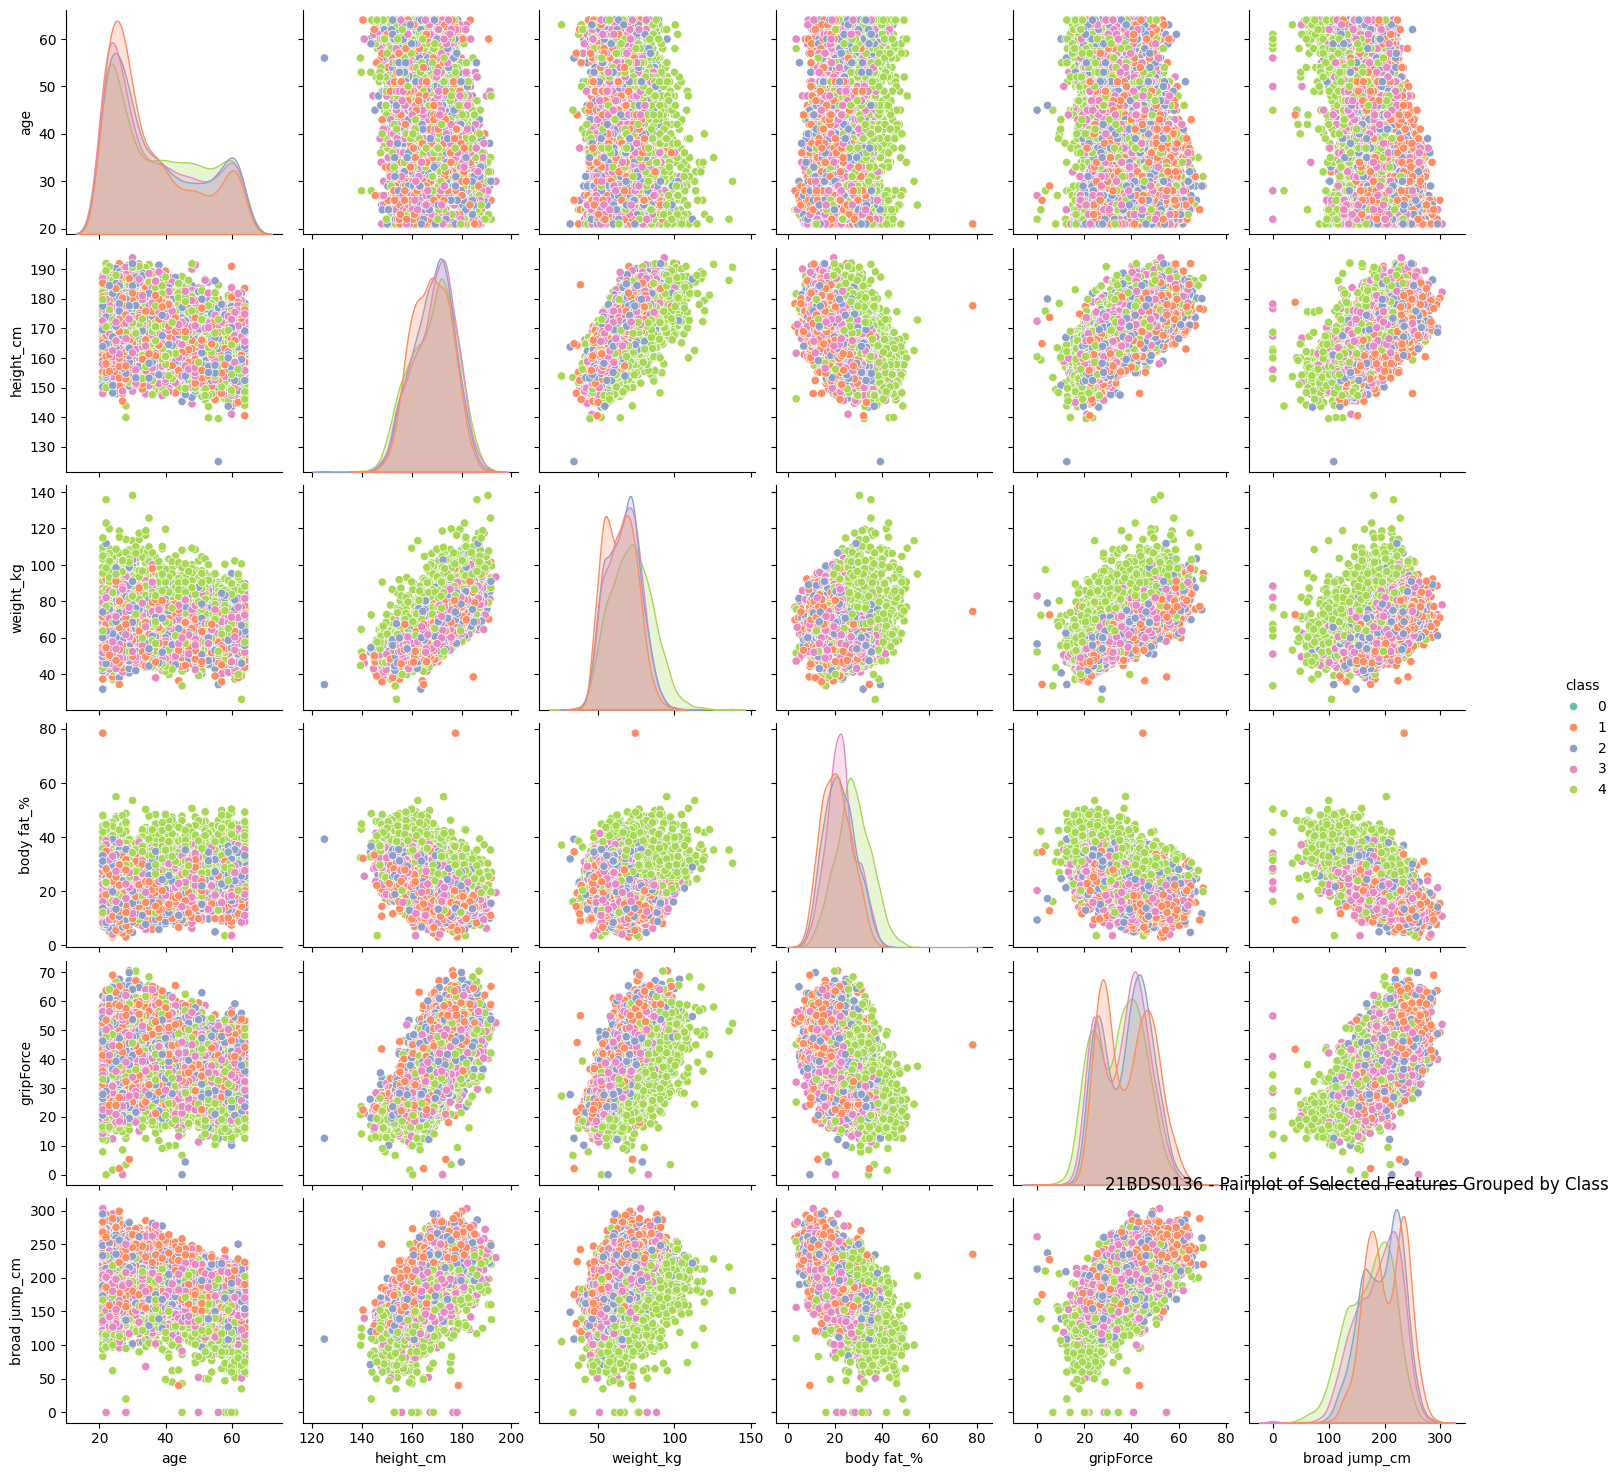

In [67]:
# Select the most relevant columns for pairplot
selected_columns = ['age', 'height_cm', 'weight_kg', 'body fat_%', 'gripForce', 'broad jump_cm', 'class']

# Generate the pairplot
sns.pairplot(data[selected_columns], hue='class', palette='Set2')
plt.title('21BDS0136 - Pairplot of Selected Features Grouped by Class')
plt.show()

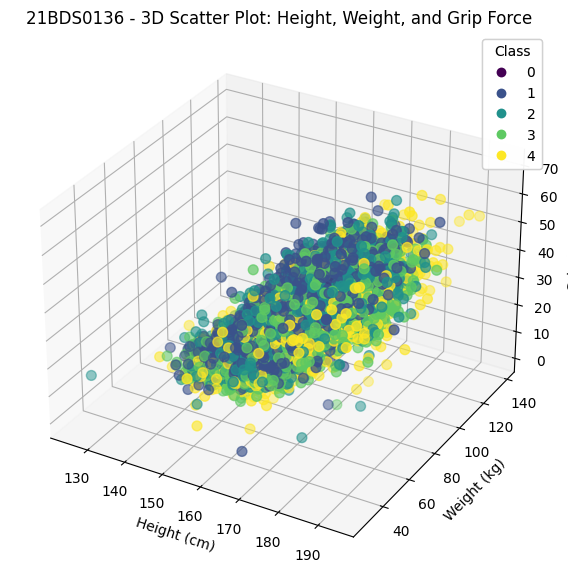

In [68]:
#3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using height, weight, and gripForce
x = data['height_cm']
y = data['weight_kg']
z = data['gripForce']

# Color by class
scatter = ax.scatter(x, y, z, c=data['class'], cmap='viridis', s=50)

# Add labels and title
ax.set_xlabel('Height (cm)')
ax.set_ylabel('Weight (kg)')
ax.set_zlabel('Grip Force')
ax.set_title('21BDS0136 - 3D Scatter Plot: Height, Weight, and Grip Force')

# Create color legend
legend1 = ax.legend(*scatter.legend_elements(), title="Class")
ax.add_artist(legend1)

plt.show()

**TIME SERIES ANALYSIS**

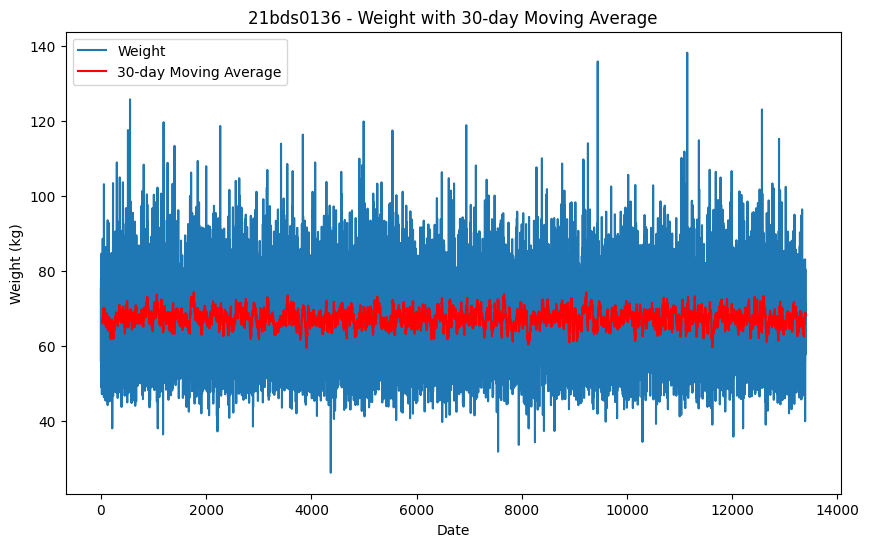

In [75]:
#Time Series Analysis (Moving Averages, Decomposition, etc.)

data['weight_ma'] = data['weight_kg'].rolling(window=30).mean()  # 30-day moving average

plt.figure(figsize=(10, 6))
plt.plot(data['weight_kg'], label='Weight')
plt.plot(data['weight_ma'], label='30-day Moving Average', color='red')
plt.title('21bds0136 - Weight with 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

In [25]:
#7: Encoding Categorical Variables
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['class'] = le.fit_transform(data['class'])



In [27]:
#8: Model Development (Random Forest Classifier)
X = data.drop('class', axis=1)
y = data['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nModel Accuracy: ", accuracy)
print("\nClassification Report:\n", report)


Model Accuracy:  0.7458006718924972

Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.85      0.79       685
           2       0.63      0.62      0.62       662
           3       0.71      0.68      0.70       650
           4       0.90      0.82      0.86       682

    accuracy                           0.75      2679
   macro avg       0.75      0.74      0.74      2679
weighted avg       0.75      0.75      0.75      2679



In [31]:

#Summary statistics for numerical columns
print("\nStatistical Summary (1-D Analysis):\n", data.describe())


Statistical Summary (1-D Analysis):
                 age        gender     height_cm     weight_kg    body fat_%  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      36.775106      0.632196    168.559807     67.447316     23.240225   
std       13.625639      0.482226      8.426583     11.949666      7.256837   
min       21.000000      0.000000    125.000000     26.300000      3.000000   
25%       25.000000      0.000000    162.400000     58.200000     18.000000   
50%       32.000000      1.000000    169.200000     67.400000     22.800000   
75%       48.000000      1.000000    174.800000     75.300000     28.000000   
max       64.000000      1.000000    193.800000    138.100000     78.400000   

          diastolic      systolic     gripForce  sit and bend forward_cm  \
count  13393.000000  13393.000000  13393.000000             13393.000000   
mean      78.796842    130.233921     36.963877                15.209268   
std       10.742033   

In [32]:
#3: 1-D Statistical Data Analysis
# Example: Summary statistics for 'age'
print("\n1-D Statistical Analysis of 'age':\n", data['age'].describe())


1-D Statistical Analysis of 'age':
 count    13393.000000
mean        36.775106
std         13.625639
min         21.000000
25%         25.000000
50%         32.000000
75%         48.000000
max         64.000000
Name: age, dtype: float64


In [33]:
#2-D Statistical Data Analysis (Correlation & Pair Analysis)
# Example: Correlation between 'age' and 'weight_kg'
print("\n2-D Statistical Analysis (Correlation) between 'age' and 'weight_kg':")
print(data[['age', 'weight_kg']].corr())


2-D Statistical Analysis (Correlation) between 'age' and 'weight_kg':
                age  weight_kg
age        1.000000  -0.099966
weight_kg -0.099966   1.000000


In [36]:
#n-D Statistical Data Analysis (Multivariate correlations)
print("\nn-D Statistical Data Analysis (Correlation Matrix):")
print(data.corr())


n-D Statistical Data Analysis (Correlation Matrix):
                              age    gender  height_cm  weight_kg  body fat_%  \
age                      1.000000 -0.060229  -0.293980  -0.099966    0.242295   
gender                  -0.060229  1.000000   0.730899   0.672887   -0.551402   
height_cm               -0.293980  0.730899   1.000000   0.734909   -0.515445   
weight_kg               -0.099966  0.672887   0.734909   1.000000   -0.084070   
body fat_%               0.242295 -0.551402  -0.515445  -0.084070    1.000000   
diastolic                0.158508  0.228552   0.145933   0.262317    0.048059   
systolic                 0.211064  0.323882   0.210169   0.338855   -0.030415   
gripForce               -0.179583  0.800184   0.735024   0.700119   -0.541784   
sit and bend forward_cm -0.070033 -0.327467  -0.221970  -0.296249   -0.071222   
sit-ups counts          -0.544581  0.474596   0.500424   0.294899   -0.608908   
broad jump_cm           -0.435172  0.704149   0.674589  

In [37]:
#Contingency Table (Gender vs Class)
contingency_table = pd.crosstab(data['gender'], data['class'])
print("\nContingency Table (Gender vs Class):\n", contingency_table)


Contingency Table (Gender vs Class):
 class   0     1     2     3     4
gender                           
0       0  1484  1185  1112  1145
1       1  1864  2162  2236  2204


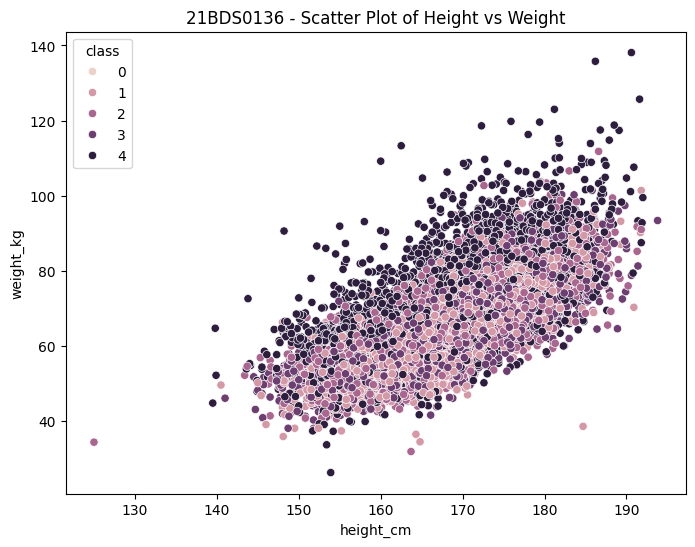

In [39]:
#Visualizations Scatter Plot

plt.figure(figsize=(8, 6))
sns.scatterplot(x='height_cm', y='weight_kg', data=data, hue='class')
plt.title('21BDS0136 - Scatter Plot of Height vs Weight')
plt.show()

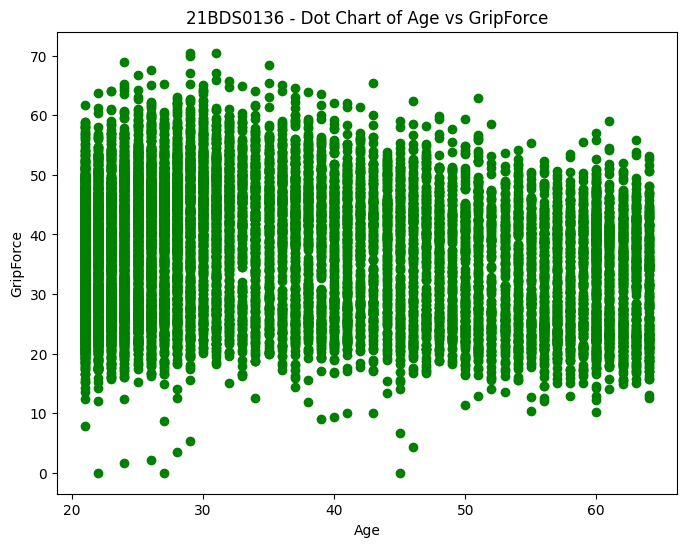

In [40]:
# Dot Chart
plt.figure(figsize=(8, 6))
plt.plot(data['age'], data['gripForce'], 'o', color='green')
plt.title('21BDS0136 - Dot Chart of Age vs GripForce')
plt.xlabel('Age')
plt.ylabel('GripForce')
plt.show()

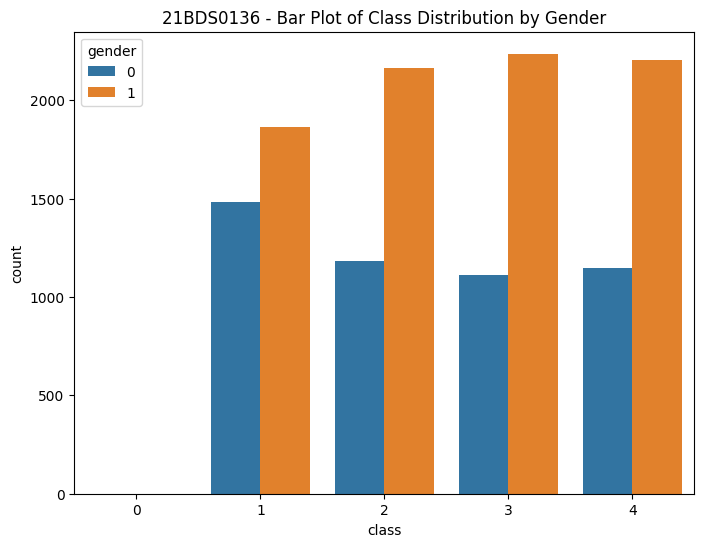

In [41]:
# Bar Plot (Example: 'gender' distribution in 'class')
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='gender', data=data)
plt.title('21BDS0136 - Bar Plot of Class Distribution by Gender')
plt.show()